In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('train.csv', encoding = 'unicode_escape')
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,1,"Oconnor, Frankie",male,NaN,2,0,209245,27.14,C12239,S
1,1,0,3,"Bryan, Drew",male,NaN,0,0,27323,13.35,NaN,S
2,2,0,3,"Owens, Kenneth",male,0.33,1,2,CA 457703,71.29,NaN,S
3,3,0,3,"Kramer, James",male,19.00,0,0,A. 10866,13.04,NaN,S
4,4,1,3,"Bond, Michael",male,25.00,0,0,427635,7.76,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99995,1,2,"Bell, Adele",female,62.00,0,0,PC 15008,14.86,D17243,C
99996,99996,0,2,"Brown, Herman",male,66.00,0,0,13273,11.15,NaN,S
99997,99997,0,3,"Childress, Charles",male,37.00,0,0,NaN,9.95,NaN,S
99998,99998,0,3,"Caughlin, Thomas",male,51.00,0,1,458654,30.92,NaN,S


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   PassengerId  100000 non-null  int64  
 1   Survived     100000 non-null  int64  
 2   Pclass       100000 non-null  int64  
 3   Name         100000 non-null  object 
 4   Sex          100000 non-null  object 
 5   Age          96708 non-null   float64
 6   SibSp        100000 non-null  int64  
 7   Parch        100000 non-null  int64  
 8   Ticket       95377 non-null   object 
 9   Fare         99866 non-null   float64
 10  Cabin        32134 non-null   object 
 11  Embarked     99750 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 9.2+ MB


In [4]:
data = data.drop(['PassengerId','Cabin'], axis='columns').dropna()

Используя информацию выше, мы видим, что в столбце "Cabin" поеимущественно NaN значения(2/3). Что бы оставить наибольшее количество данных, перед очисткой данных от NaN, удаляем данный солбец. Так же удаляем столбец "PassengerId", ведь для анализа он не требуется.

In [5]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,91880.000000,91880.000000,91880.000000,91880.000000,91880.000000,91880.000000
mean,0.423520,2.072312,38.516882,0.394384,0.465596,45.404697
std,0.494119,0.838325,18.303124,0.850912,0.962805,70.774805
min,0.000000,1.000000,0.080000,0.000000,0.000000,0.680000
25%,0.000000,1.000000,25.000000,0.000000,0.000000,10.230000
50%,0.000000,2.000000,39.000000,0.000000,0.000000,25.160000
75%,1.000000,3.000000,53.000000,1.000000,1.000000,34.432500
max,1.000000,3.000000,87.000000,8.000000,9.000000,744.660000


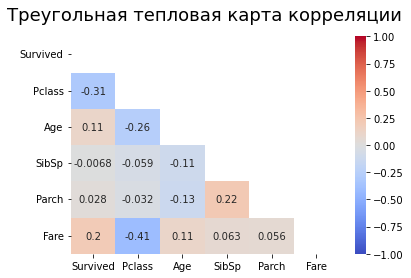

In [6]:
upp_mat = np.triu(data.corr())
heatmap = sns.heatmap(data.corr(), vmin = -1, vmax = +1, annot = True, cmap = 'coolwarm', mask = upp_mat)
heatmap.set_title('Треугольная тепловая карта корреляции', fontdict={'fontsize':18}, pad=16);

<AxesSubplot:xlabel='Age', ylabel='Count'>

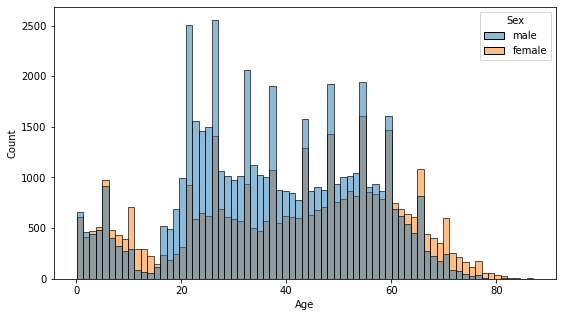

In [7]:
plt.figure(figsize=(9, 5))
sns.histplot(data=data, x='Age', hue='Sex')

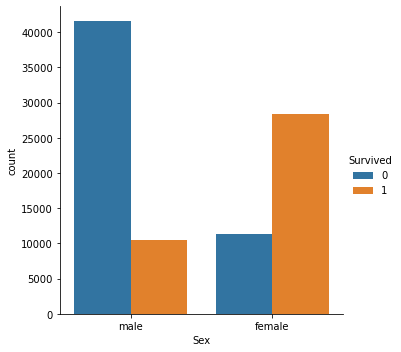

In [8]:
sns.catplot(x ="Sex", hue ="Survived",kind ="count", data = data)

На графике выше мы видим, что смертность мужчин в разы больше, нежели женщин. Из всех мужчины выжило примерно 25%, из женщин 75%. Следовательно пол играет важную роль в выживнии человека.

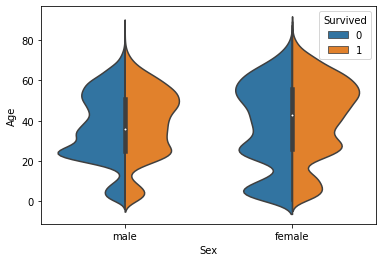

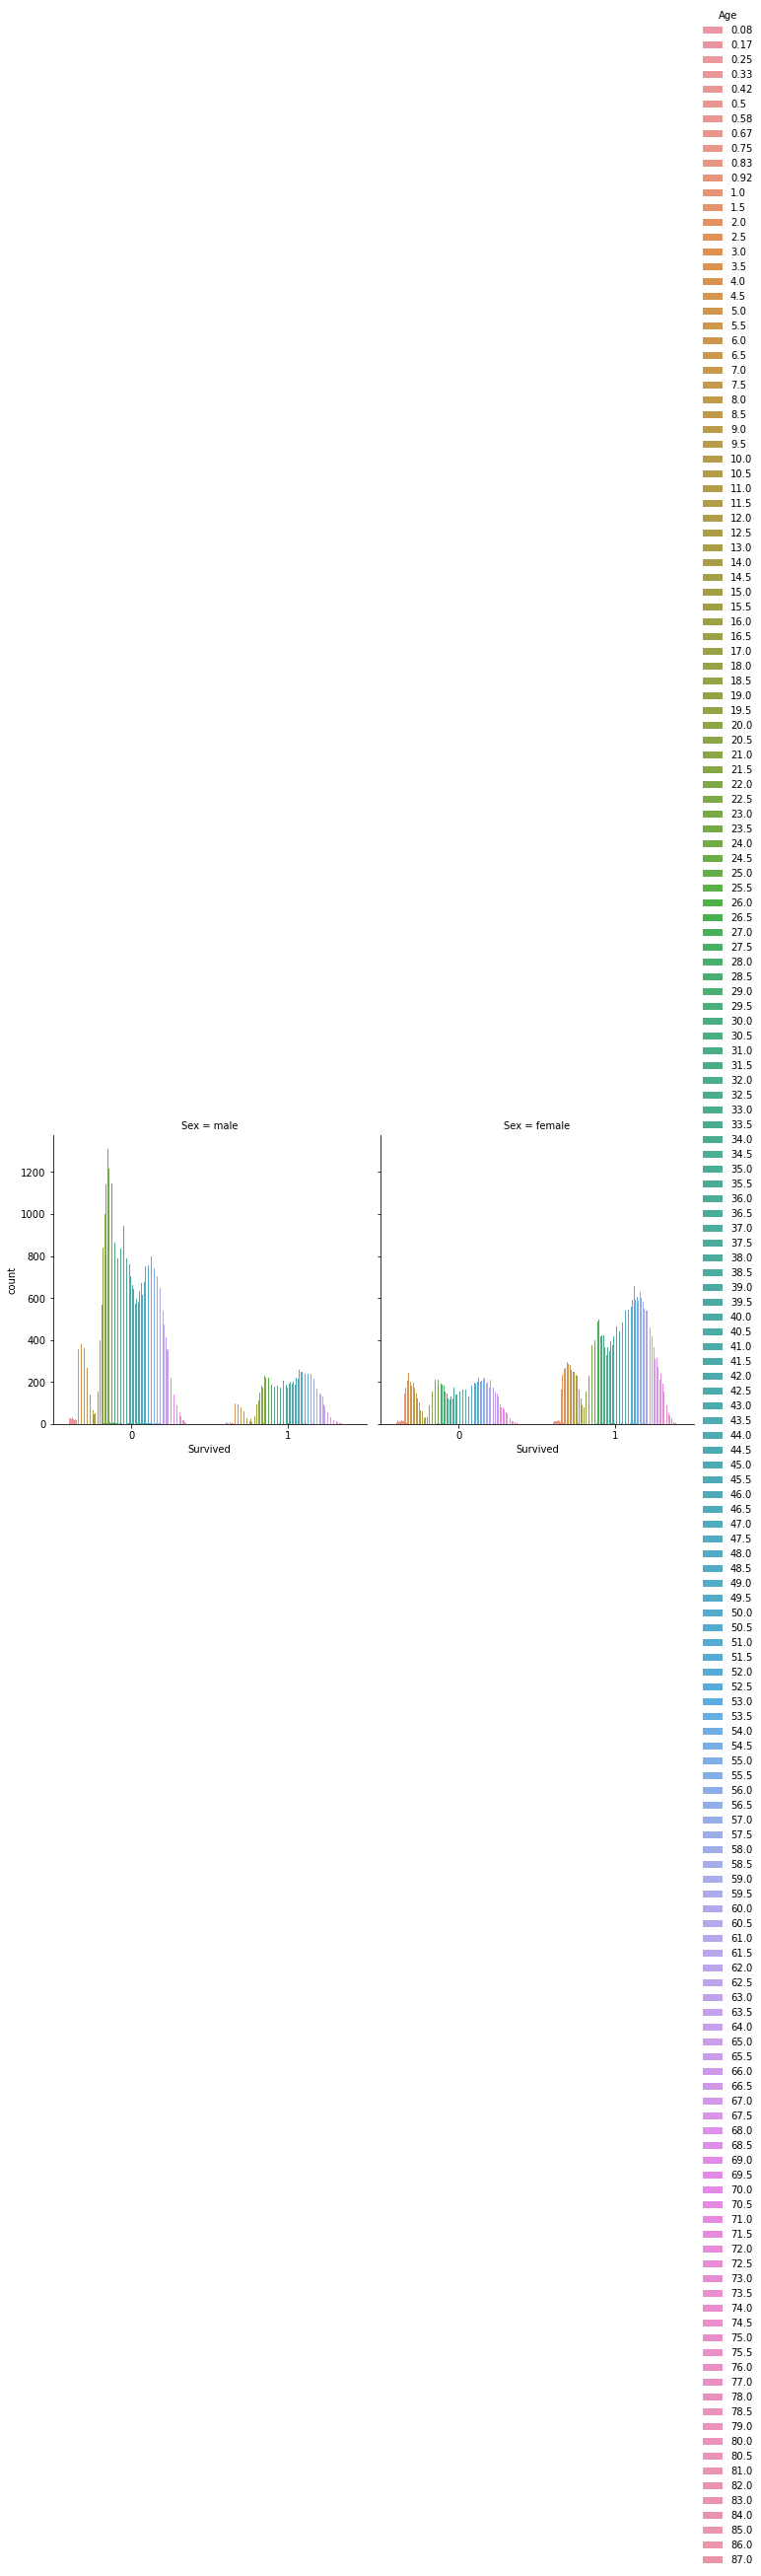

In [9]:
sns.violinplot(x ="Sex", y ="Age", hue ="Survived",data = data, split = True)
sns.catplot(x ='Survived', hue ='Age',kind ='count', col ='Sex', data = data)

Графики выше показывает зависимость выживания мужчин или женщин от возраста. Чем старше мужчина(начиная с 22 лет), тем меньше вероятность его смерти. Так же смертность у детей и подростков женского пола выше, нежели мужского.

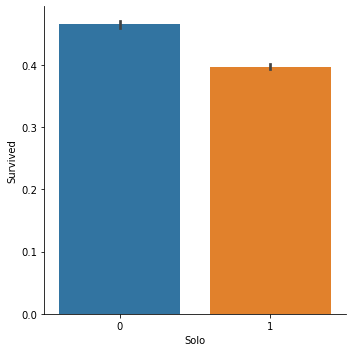

In [10]:
data['Solo'] = 0
data['Family_Size'] = 0
data['Family_Size'] = data['Parch']+data['SibSp']
data.loc[data.Family_Size == 0, 'Solo'] = 1
sns.catplot(x ='Solo', y ='Survived', data=data, kind='bar')

График выше показывает, что выжить человеку без семьи труднее, нежели с семьей 

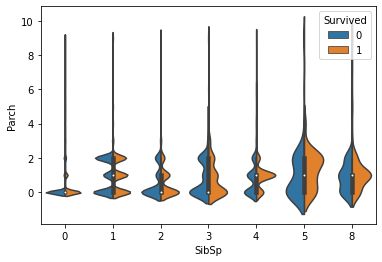

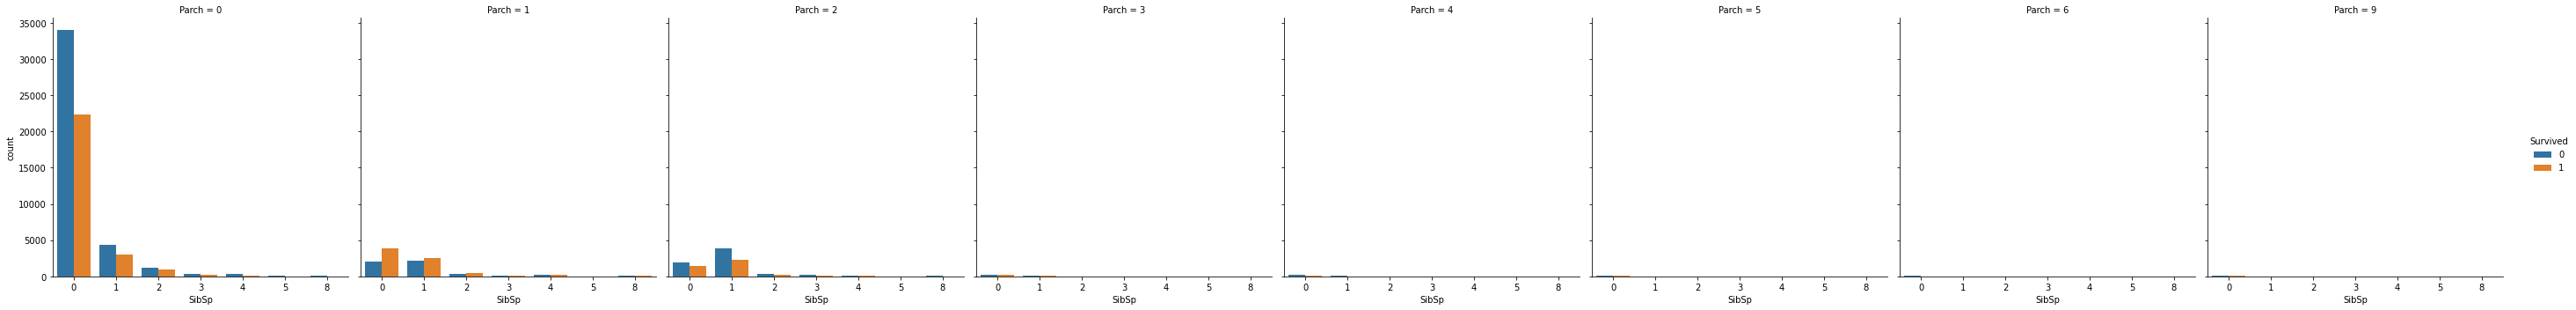

In [11]:
sns.violinplot(x ="SibSp", y ="Parch", hue ="Survived",data = data, split = True)
sns.catplot(x ='SibSp', hue ='Survived',kind ='count', col ='Parch', data = data)

Графики выше показыает выживаемость человека в зависимости от количества братьев и сестер / супругов а так же 
родителей / детейю. Шанс на выживание больше при наличии одного ребенка/родителя и отсутствии братьев и сестер / супругов

<AxesSubplot:xlabel='Survived', ylabel='Pclass'>

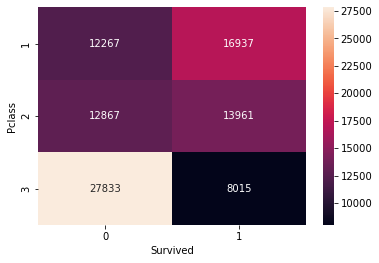

In [12]:
data_group_pclass_survived = data.groupby(['Pclass', 'Survived'])
pclass_survived = data_group_pclass_survived.size().unstack()
sns.heatmap(pclass_survived, annot = True, fmt ="d")

Карта выше показывает зависимотсть выживания от класса билета. Чем выше класс, тем выше возможность выжить.

<AxesSubplot:xlabel='Fare_Range', ylabel='Survived'>

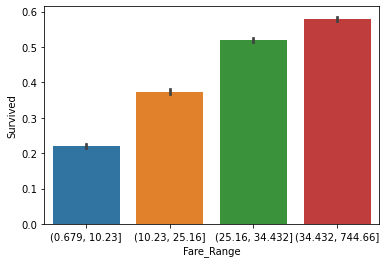

In [13]:
data['Fare_Range'] = pd.qcut(data['Fare'], 4)
sns.barplot(x ='Fare_Range', y ='Survived',data = data)

На графике выше показана зависимость выживания от цены билета, разделенной на четыре группы. Чем выше стоимость билета, тем больше шанс выжить 

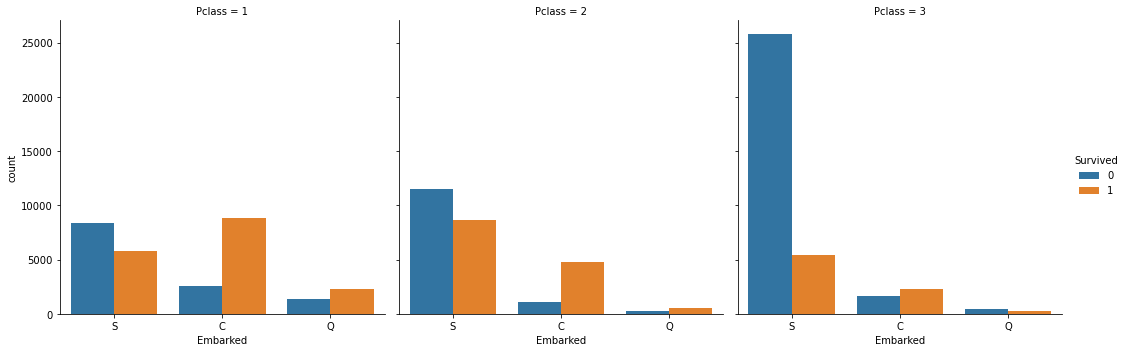

In [14]:
sns.catplot(x ='Embarked', hue ='Survived',kind ='count', col ='Pclass', data = data)

Графики выше показывают выживаемость в зависимости от класса и порта, где человек сел на борт. Больше всего не повезло людям, севшим на борт в "Southampton" и купившим билет третьего класса 

In [15]:
data_1 = pd.read_csv('train.csv', encoding = 'unicode_escape')
data_1

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,1,"Oconnor, Frankie",male,NaN,2,0,209245,27.14,C12239,S
1,1,0,3,"Bryan, Drew",male,NaN,0,0,27323,13.35,NaN,S
2,2,0,3,"Owens, Kenneth",male,0.33,1,2,CA 457703,71.29,NaN,S
3,3,0,3,"Kramer, James",male,19.00,0,0,A. 10866,13.04,NaN,S
4,4,1,3,"Bond, Michael",male,25.00,0,0,427635,7.76,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99995,1,2,"Bell, Adele",female,62.00,0,0,PC 15008,14.86,D17243,C
99996,99996,0,2,"Brown, Herman",male,66.00,0,0,13273,11.15,NaN,S
99997,99997,0,3,"Childress, Charles",male,37.00,0,0,NaN,9.95,NaN,S
99998,99998,0,3,"Caughlin, Thomas",male,51.00,0,1,458654,30.92,NaN,S


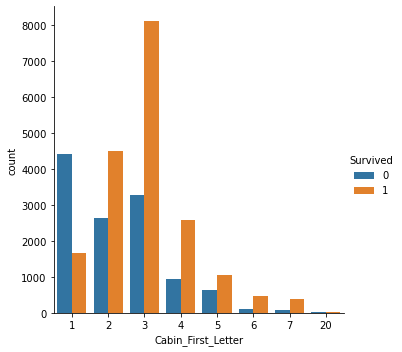

In [19]:
data_1 = data_1.dropna()
data_1['Cabin_First_Letter'] = data_1['Cabin'].str.get(0)
data_1['Cabin_First_Letter'] = data_1['Cabin_First_Letter'].replace({"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7, "H": 8, "I": 9, "J": 10, "K": 11, "L": 12, "M": 13, "N": 14, "O": 15, "P": 16, "Q":17,"R":18, "S": 19, "T": 20,"U": 21, "V": 22, "W": 23, "X": 24, "Y": 25, "Z":26})
sns.catplot(x ="Cabin_First_Letter", hue ="Survived",kind ="count", data = data_1)

In [ ]:
Немного инфы о палубах титаника: На «Титанике» имелось 8 стальных палуб, расположенных друг над другом на расстоянии 2,5—3,
2 м. Самая верхняя была шлюпочная, под ней находилось семь остальных, обозначенных сверху вниз буквами от «A» до «G».
График выше показывает зависимость выживаемости от номера палубы. Получается, что больше всего вышивших "из" С палубы. 
Правда это мусорные данные, т.к. брались по 1/3 датасета